# Natural language processing

## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности 
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории. 

In [1]:
# Код тут
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

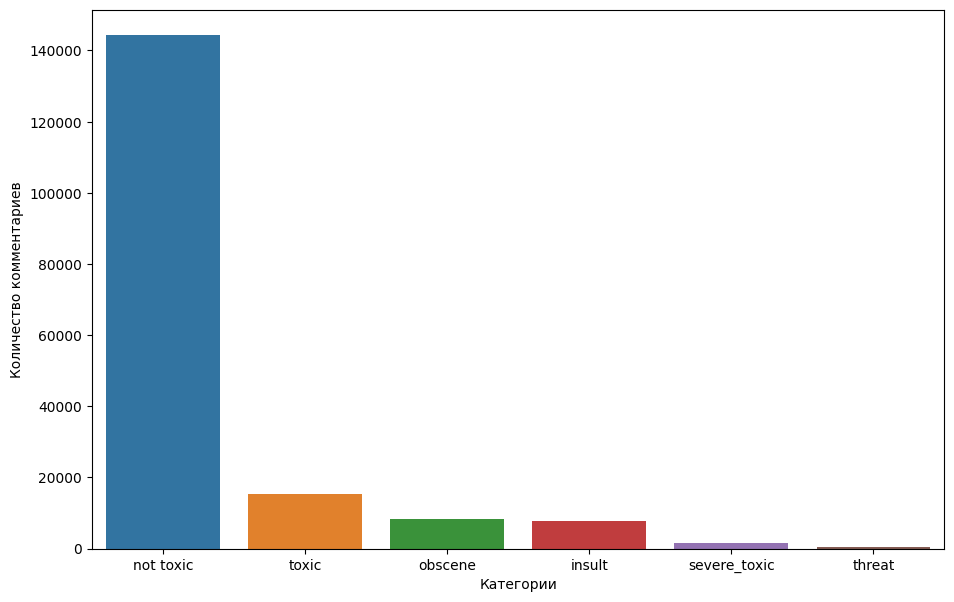

In [2]:
df = pd.read_csv('../datasets/toxic.csv')
toxic = df['toxic'].sum()
not_toxic = len(df) - toxic
obscene = df['obscene'].sum()
insult = df['insult'].sum()
severe_toxic = df['severe_toxic'].sum()
threat = df['threat'].sum()

data = {"not toxic": not_toxic, 'toxic': toxic, 'obscene': obscene, \
        'insult': insult, 'severe_toxic': severe_toxic, 'threat': threat}
df_count = pd.DataFrame(data, index=["Количество комментариев"])
plt.figure(figsize=(11, 7))
sns.barplot(data=df_count)
plt.xlabel('Категории')
plt.ylabel("Количество комментариев")
plt.show()

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев: 
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита 
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [3]:
# Код тут
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from string import ascii_letters
nltk.download('stopwords')

# Установка пунктуации и стоп-слов
punctuation = set(string.punctuation)
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1091)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1091)>


False

In [4]:
# Функция для обработки текста комментария
def process_comment(comm):
    # Приведение к нижнему регистру
    comm = comm.str.lower()
    comm_text = ' '.join(comm)
    
    # Токенизация
    token = word_tokenize(comm_text)
    
    # Фильтрация по английским словам
    token = [x for x in token if all(map(lambda c: c in ascii_letters, x)) == True]
    
    # Удаление знаков препинания/цифр
    token = [x for x in token if x.isalpha()]
    
    # Удаление стоп-слов
    token = [x for x in token if x not in stop_words]
    
    return token

# Обработка комментариев и вывод количества токенов
comments = df['comment_text'][df['id'] == '000103f0d9cfb60f']

token_ = process_comment(comments)
num_tokens = len(token_)
num_tokens, token_

(9,
 ['matches',
  'background',
  'colour',
  'seemingly',
  'stuck',
  'thanks',
  'talk',
  'january',
  'utc'])

## Task 3

Раздели выборку на тренировачную и тестовоую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

In [1]:
# Код тут
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

ModuleNotFoundError: No module named 'scipy.sparse'

In [11]:
# Разделение выборки на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(comment, tokens, test_size=0.3, random_state=21, shuffle=True)

# Преобразование текстов с помощью TF-IDF
vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

NameError: name 'train_test_split' is not defined

## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [4]:
 # Создание и обучение модели RidgeClassifier
model = RidgeClassifier()
model.fit(X_train_tfidf, y_train)

# Прогнозирование меток для тестовой выборки
y_pred = model.predict(X_test_tfidf)

# Преобразование y_test в DataFrame
y_test_df = pd.DataFrame(y_test)

# Проверка размерности y_pred и изменение формы, если необходимо
if len(y_pred.shape) == 1:
    y_pred = y_pred.reshape(-1, 1)

# Вычисление ROC-AUC для каждого класса
roc_auc_scores = []
for i in range(len(y_test_df.columns)):
    roc_auc = roc_auc_score(y_test_df.iloc[:, i], y_pred[:, i])
    roc_auc_scores.append(roc_auc)

# Вывод значений ROC-AUC для каждого класса
for i in range(len(y_test_df.columns)):
    print(f"ROC-AUC for class '{y_test_df.columns[i]}': {roc_auc_scores[i]}")

## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель. 
Получилось ли увеличить качество классификации?

In [5]:
# Код тут
df.corr()